In [28]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from scipy.optimize import curve_fit
sb.set() # set the default Seaborn style for graphics

In [22]:
gm_tc1_df = pd.read_csv('gm_tc1.csv')
gm_tc1_df['v2']=gm_tc1_df['|V|']*gm_tc1_df['|V|']
gm_tc1_df.head()

,|V|,Time_elapsed(ns),v2
0,200,449300,40000
1,201,481200,40401
2,202,468200,40804
3,203,454800,41209
4,204,450000,41616


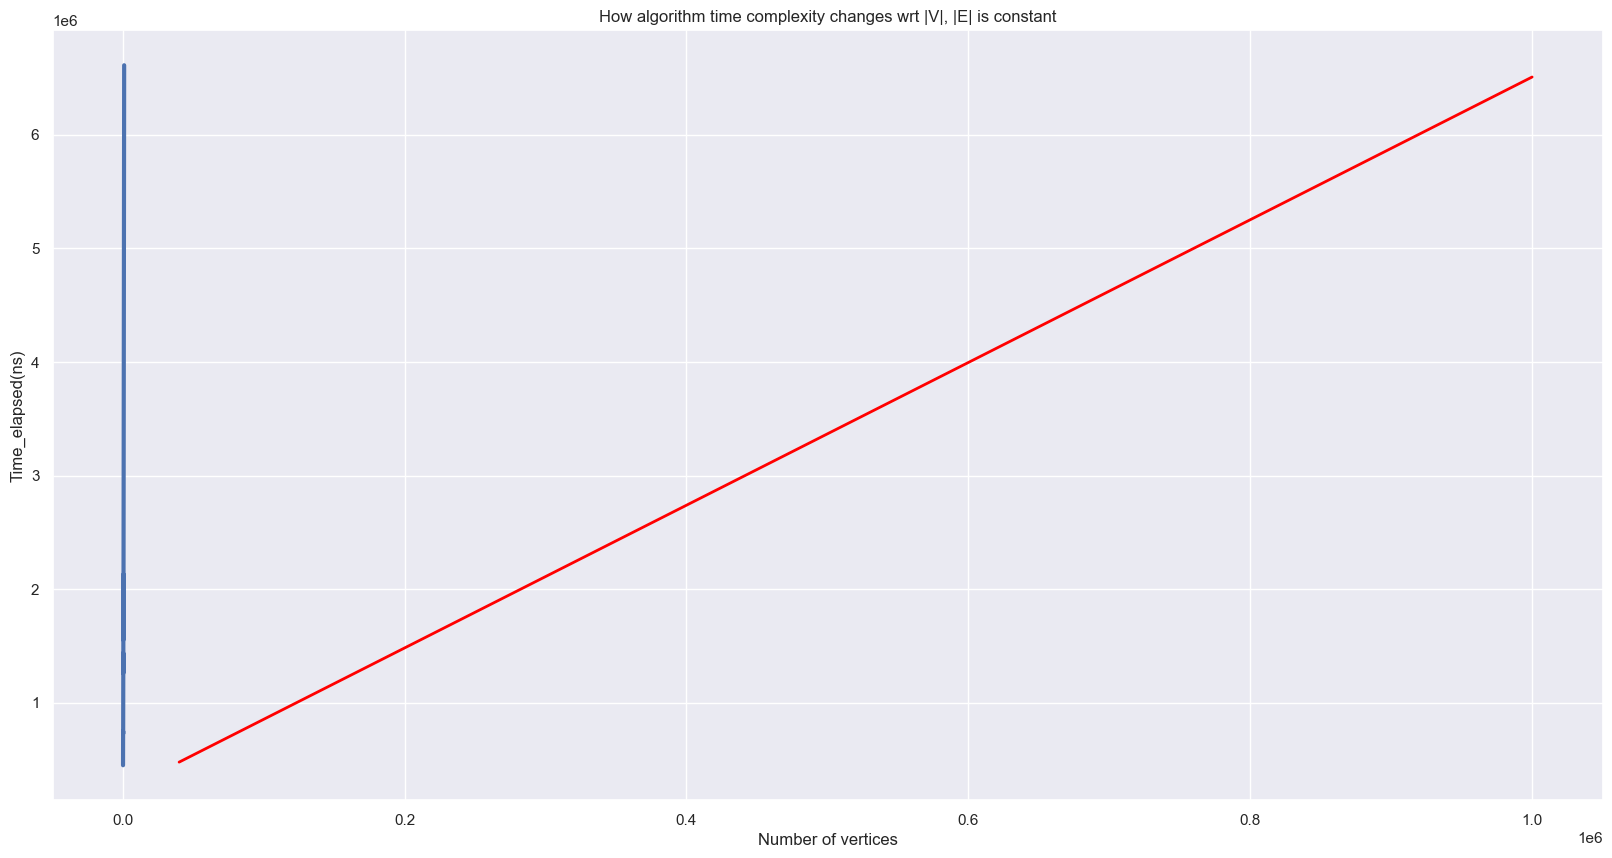

In [23]:
plt.figure(figsize=(20,10))
plt.plot(gm_tc1_df['|V|'], gm_tc1_df['Time_elapsed(ns)'],label = "Adjacency matrix - |E| is constant", linewidth=3)

x = gm_tc1_df['v2']
y = gm_tc1_df['Time_elapsed(ns)']
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b, color='red',label = "Adjacency matrix - |E| is constant", linewidth=2)

plt.xlabel('Number of vertices')
plt.ylabel('Time_elapsed(ns)')
plt.title('How algorithm time complexity changes wrt |V|, |E| is constant')

plt.show()

#How algorithm time complexity changes wrt |V|, |E| should be a constant

In [29]:
# Define the nonlinear function
def quadratic_func(x, a, b, c):
    return a + b * x + c * x**2


def log_func(x, a, b):
    return a + b * x * np.log(x)#x*a*np.log(x)+b
    
# def log_func(x, a, b, c): # x-shifted log
#     return a*np.log(x + b)+c

/var/folders/ft/qq0rt9vd4338frn1fz0pq1cw0000gn/T/ipykernel_6827/323217345.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, quadratic_func(x, *popt), 'r-', label='Best |V|^2 fit',  color='red', linewidth=2)


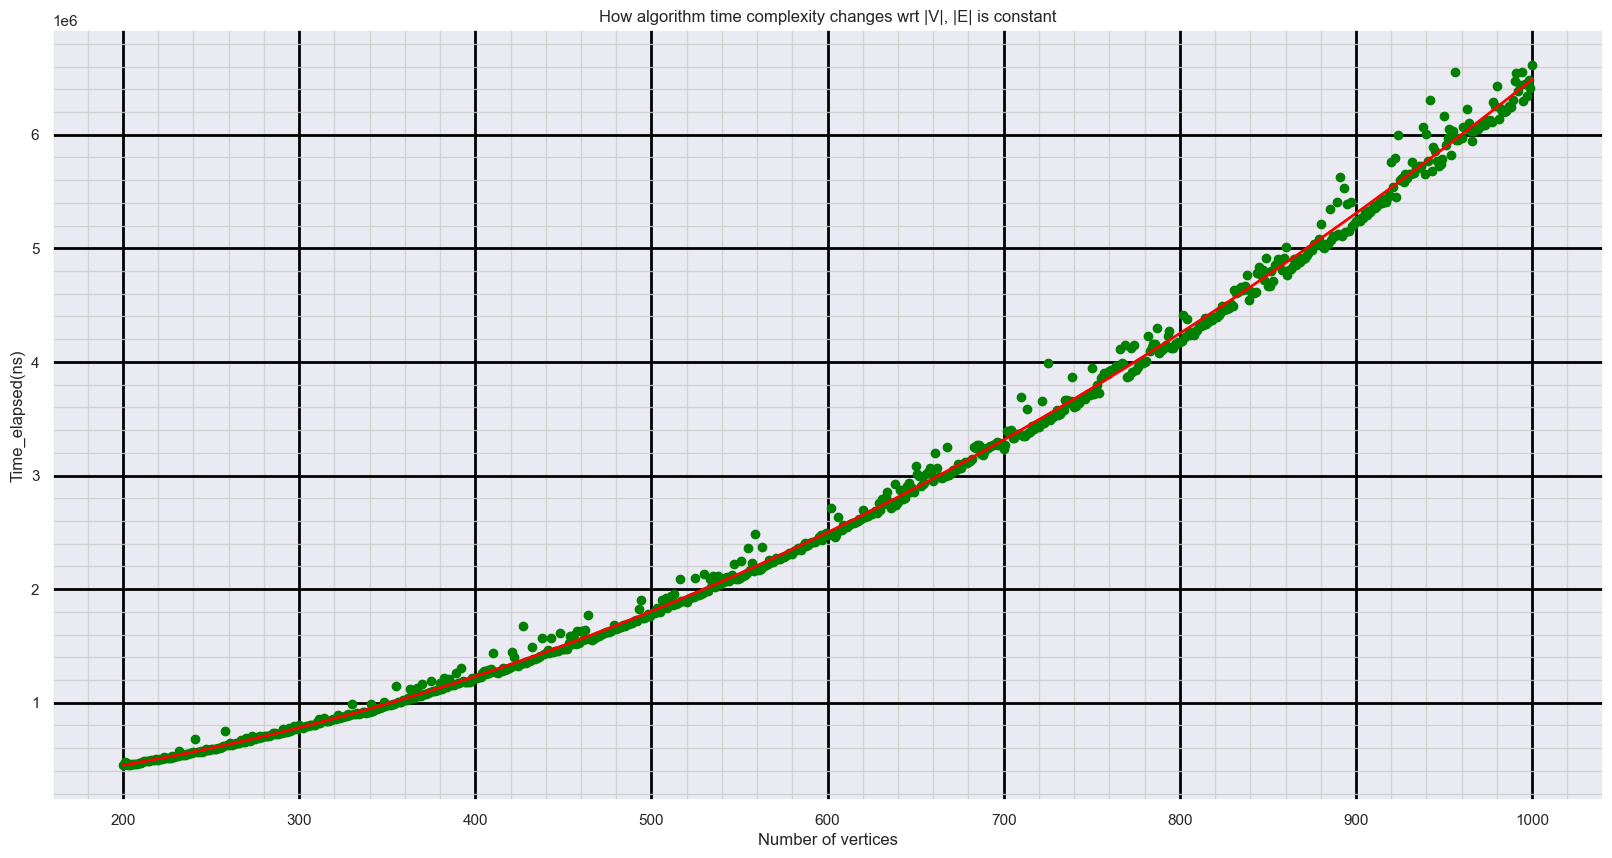

In [45]:
plt.figure(figsize=(20,10))
x = gm_tc1_df['|V|']
y = gm_tc1_df['Time_elapsed(ns)']
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color='green')
plt.grid(color ='black', linewidth=2)
plt.minorticks_on()
plt.grid(which='minor', color='0.8', alpha=0.8)
plt.xlabel('Number of vertices')
plt.ylabel('Time_elapsed(ns)')
plt.title('How algorithm time complexity changes wrt |V|, |E| is constant')
popt, pcov = curve_fit(quadratic_func, x, y)
plt.plot(x, quadratic_func(x, *popt), 'r-', label='Best |V|^2 fit',  color='red', linewidth=2)

#add line of best fit to plot
#plt.plot(x, a*x*x+b, color='red',label = "Adjacency matrix - |E| is constant", linewidth=2)

In [53]:
gm_tc2_df = pd.read_csv('gm_tc2.csv')
gm_tc2_df['loge'] = np.log10(gm_tc2_df['|E|'])
gm_tc2_df['eloge'] = gm_tc2_df['|E|'] * gm_tc2_df['loge']
gm_tc2_df.head()

,|E|,Time_elapsed(ns),loge,eloge
0,99,85700,1.995635,197.567884
1,100,85200,2.000000,200.000000
2,101,84500,2.004321,202.436459
3,102,85300,2.008600,204.877218
4,103,83900,2.012837,207.322234


C:\Users\Shu Shuang\AppData\Local\Temp\ipykernel_21752\103510247.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color ='black', linewidth=2)
C:\Users\Shu Shuang\AppData\Local\Temp\ipykernel_21752\103510247.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='0.8', alpha=0.8)


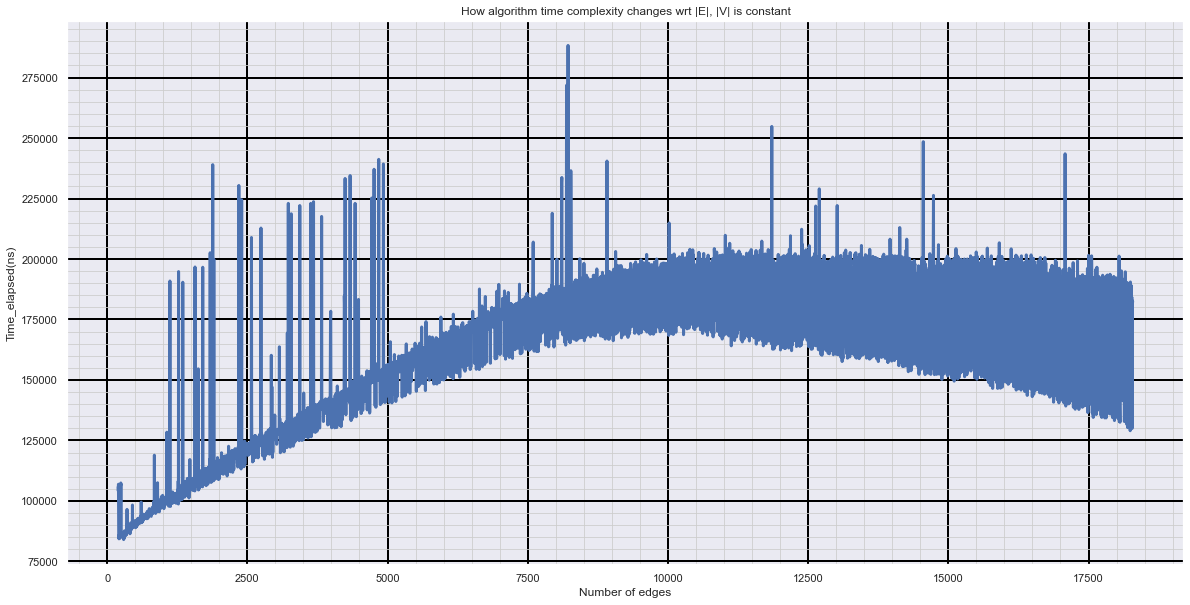

In [33]:
plt.figure(figsize=(20,10))
plt.plot(gm_tc2_df['eloge'], gm_tc2_df['Time_elapsed(ns)'],label = "Adjacency matrix - |V| is constant", linewidth=3)
plt.grid(b=True, color ='black', linewidth=2)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='0.8', alpha=0.8)

plt.xlabel('Number of edges')
plt.ylabel('Time_elapsed(ns)')
plt.title('How algorithm time complexity changes wrt |E|, |V| is constant')

plt.show()

C:\Users\Shu Shuang\AppData\Local\Temp\ipykernel_21752\1998047724.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color ='black', linewidth=2)
C:\Users\Shu Shuang\AppData\Local\Temp\ipykernel_21752\1998047724.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='0.8', alpha=0.8)


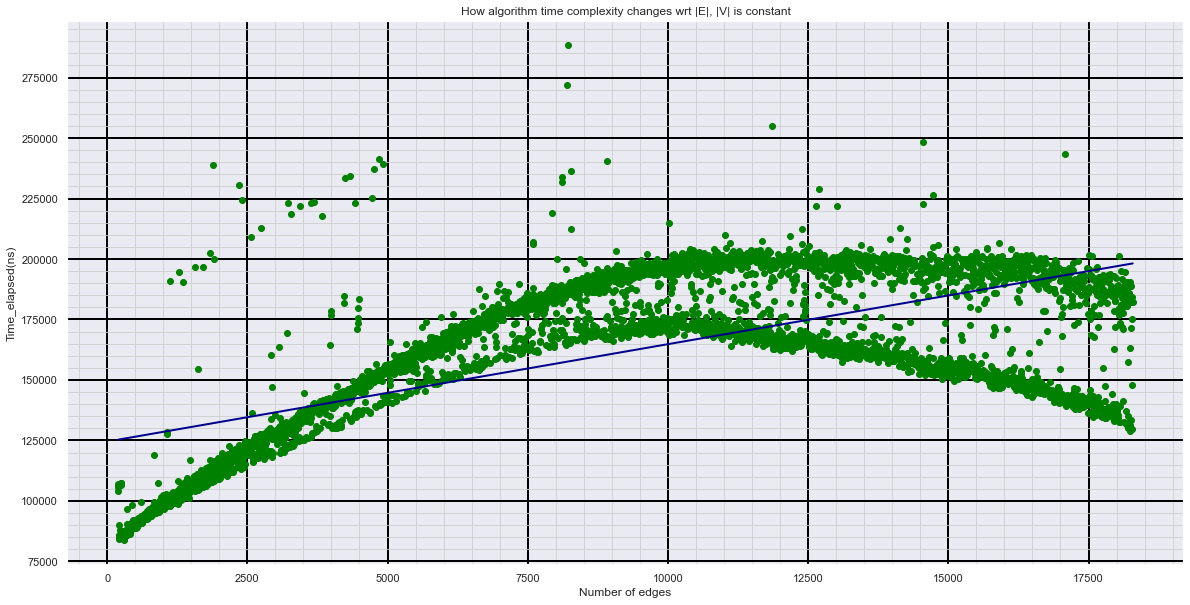

In [34]:
plt.figure(figsize=(20,10))
x1 = gm_tc2_df['eloge']
y1 = gm_tc2_df['Time_elapsed(ns)']
a, b = np.polyfit(x1, y1, 1)
plt.scatter(x1, y1, color='green')
plt.grid(b=True, color ='black', linewidth=2)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='0.8', alpha=0.8)
plt.xlabel('Number of edges')
plt.ylabel('Time_elapsed(ns)')
plt.title('How algorithm time complexity changes wrt |E|, |V| is constant')

#add line of best fit to plot
plt.plot(x1, a*x1+b, color='darkblue',label = "Adjacency matrix - |V| is constant", linewidth=2)

In [37]:
ga_tc1_heap_df = pd.read_csv('ga_tc1_heap.csv')
ga_tc1_heap_df['logv'] = np.log10(ga_tc1_heap_df['|V|'])
ga_tc1_heap_df['vlogv'] = ga_tc1_heap_df['|V|'] * ga_tc1_heap_df['logv']
ga_tc1_heap_df.head()

,|V|,Time_elapsed(ns),logv,vlogv
0,200,442800,2.301030,460.205999
1,201,456000,2.303196,462.942408
2,202,442900,2.305351,465.680977
3,203,461500,2.307496,468.421696
4,204,448200,2.309630,471.164554


In [36]:
plt.figure(figsize=(20,10))
plt.plot(ga_tc1_heap_df['vlogv'], ga_tc1_heap_df['Time_elapsed(ns)'],label = "Array of adjacency list - |E| is constant", linewidth=3)
plt.grid(b=True, color ='black', linewidth=2)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='0.8', alpha=0.8)

plt.xlabel('Number of edges')
plt.ylabel('Time_elapsed(ns)')
plt.title('How algorithm time complexity changes wrt |V|, |E| is constant')

plt.show()

NameError: name 'ga_tc1_heap_df' is not defined

<Figure size 2000x1000 with 0 Axes>

/var/folders/ft/qq0rt9vd4338frn1fz0pq1cw0000gn/T/ipykernel_6827/3141059138.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, log_func(x, *popt_log), 'r-', label='Best |V| log |V| fit',  color='red', linewidth=2)


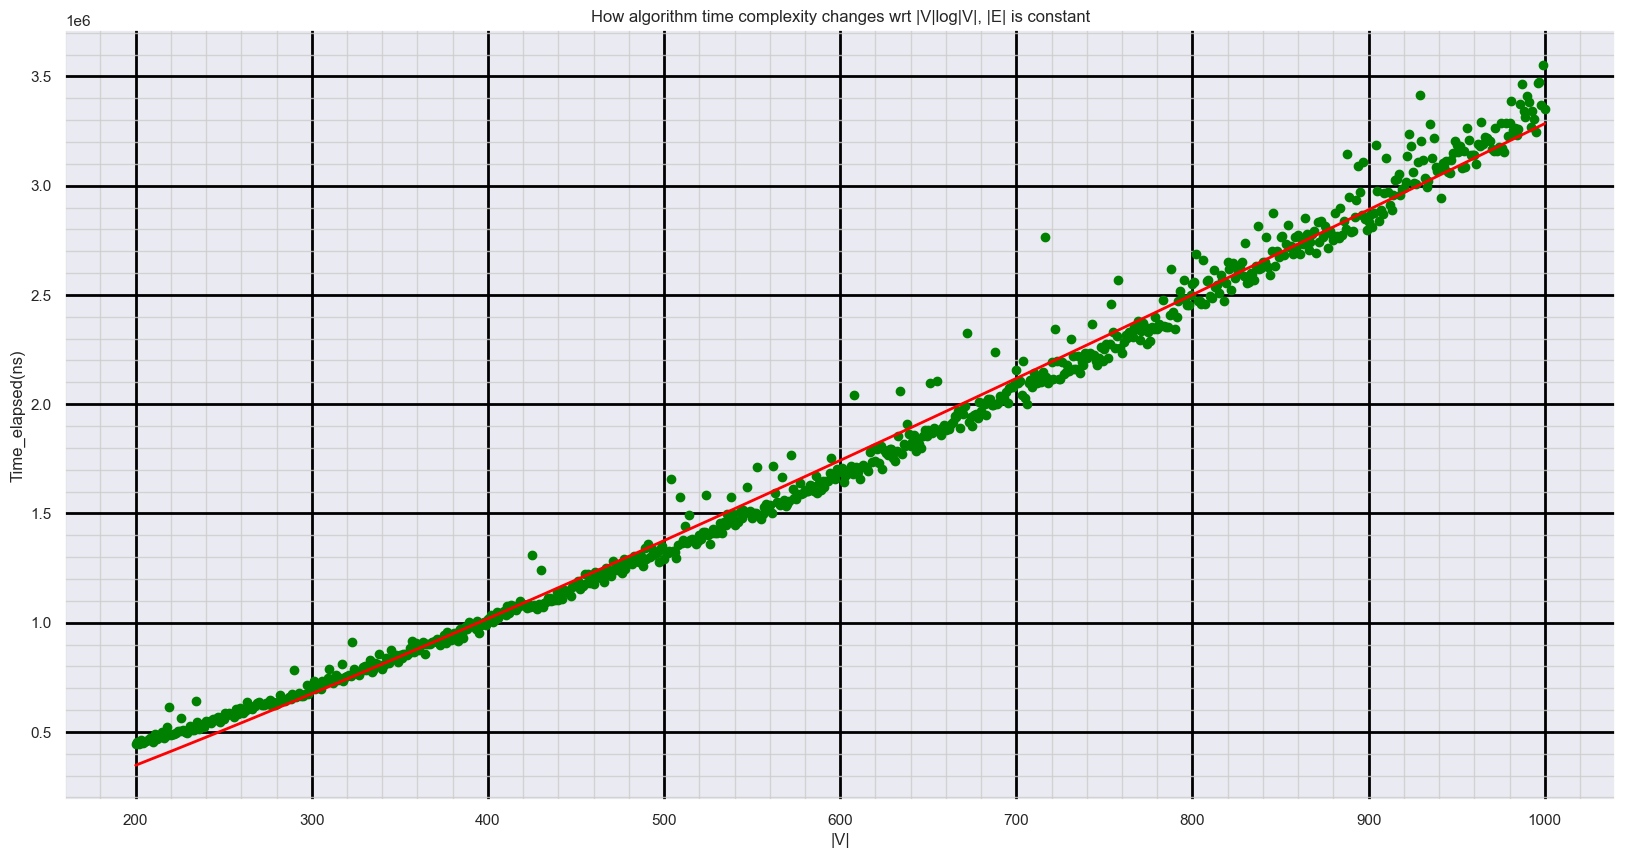

In [44]:
plt.figure(figsize=(20,10))
x = ga_tc1_heap_df['|V|']
y = ga_tc1_heap_df['Time_elapsed(ns)']
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color='green')
plt.grid(color ='black', linewidth=2)
plt.minorticks_on()
plt.grid(which='minor', color='0.8', alpha=0.8)
plt.xlabel('|V|')
plt.ylabel('Time_elapsed(ns)')
plt.title('How algorithm time complexity changes wrt |V|log|V|, |E| is constant')

#add line of best fit to plot
popt_log, pcov = curve_fit(log_func, x, y)
plt.plot(x, log_func(x, *popt_log), 'r-', label='Best |V| log |V| fit',  color='red', linewidth=2)
#plt.plot(x, a*x+b, color='darkblue', label = "Array of adjacency list - |E| is constant", linewidth=2)

In [39]:
ga_tc2_heap_df = pd.read_csv('ga_tc2_heap.csv')
ga_tc2_heap_df.head()

,|E|,Time_elapsed(ns)
0,99,50900
1,100,50700
2,101,48400
3,102,52200
4,103,46500


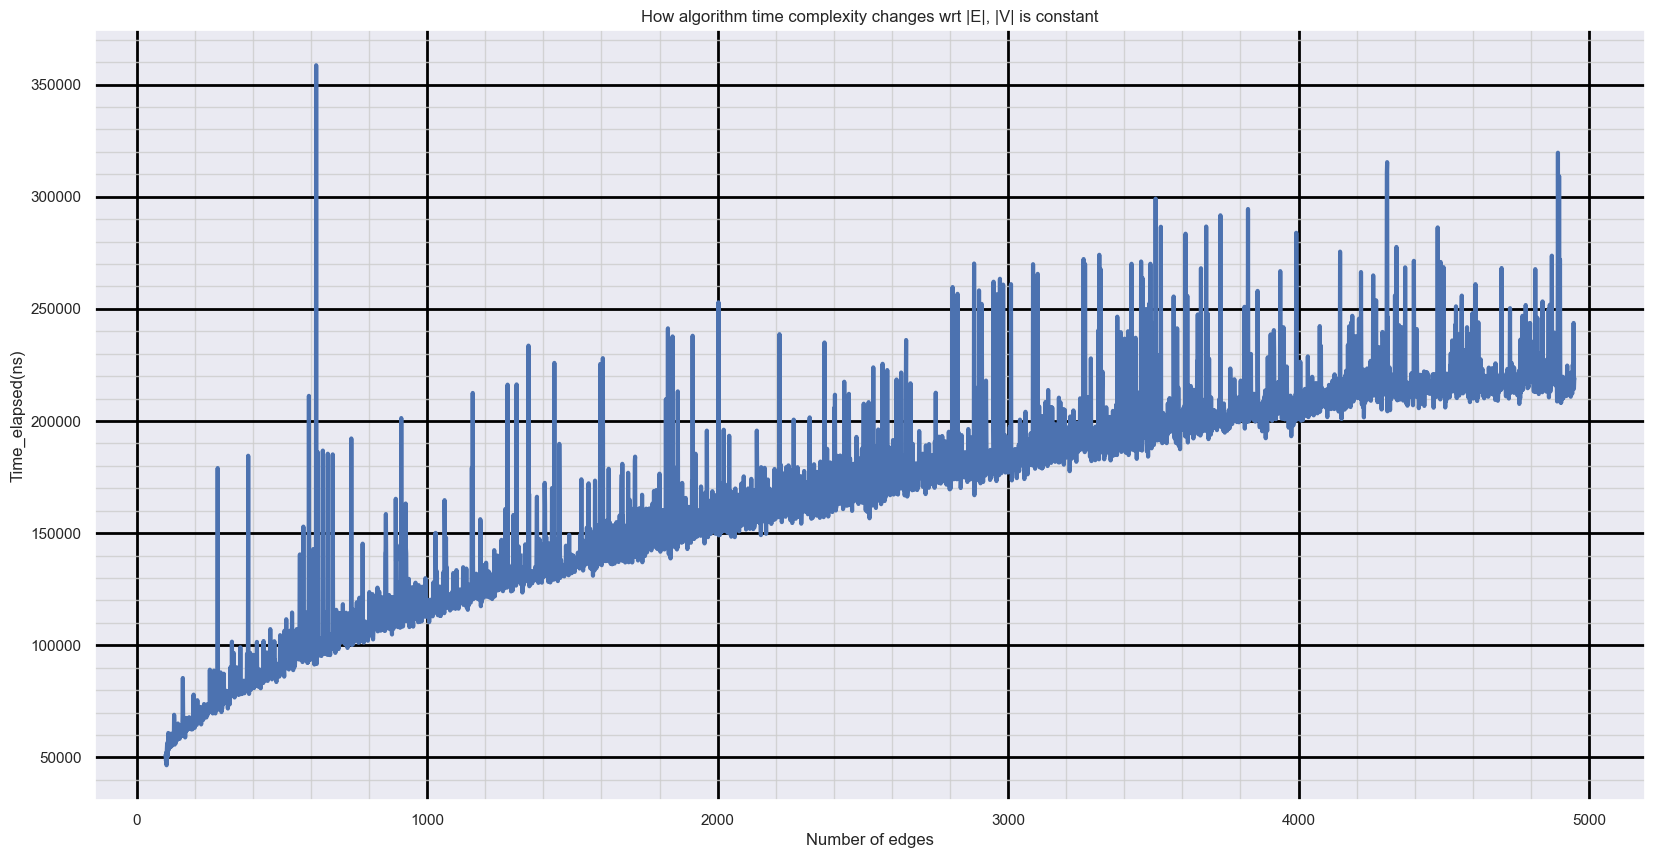

In [55]:
plt.figure(figsize=(20,10))
plt.plot(ga_tc2_heap_df['|E|'], ga_tc2_heap_df['Time_elapsed(ns)'],label = "Array of adjacency list - |E| is constant", linewidth=3)
plt.grid( color ='black', linewidth=2)
plt.minorticks_on()
plt.grid(which='minor', color='0.8', alpha=0.8)

plt.xlabel('Number of edges')
plt.ylabel('Time_elapsed(ns)')
plt.title('How algorithm time complexity changes wrt |E|, |V| is constant')

plt.show()

In [40]:
gm_tc1_df = pd.read_csv('gm_tc1.csv')
gm_tc1_df.head()

,|V|,Time_elapsed(ns)
0,200,508700
1,201,510000
2,202,515300
3,203,507300
4,204,513900


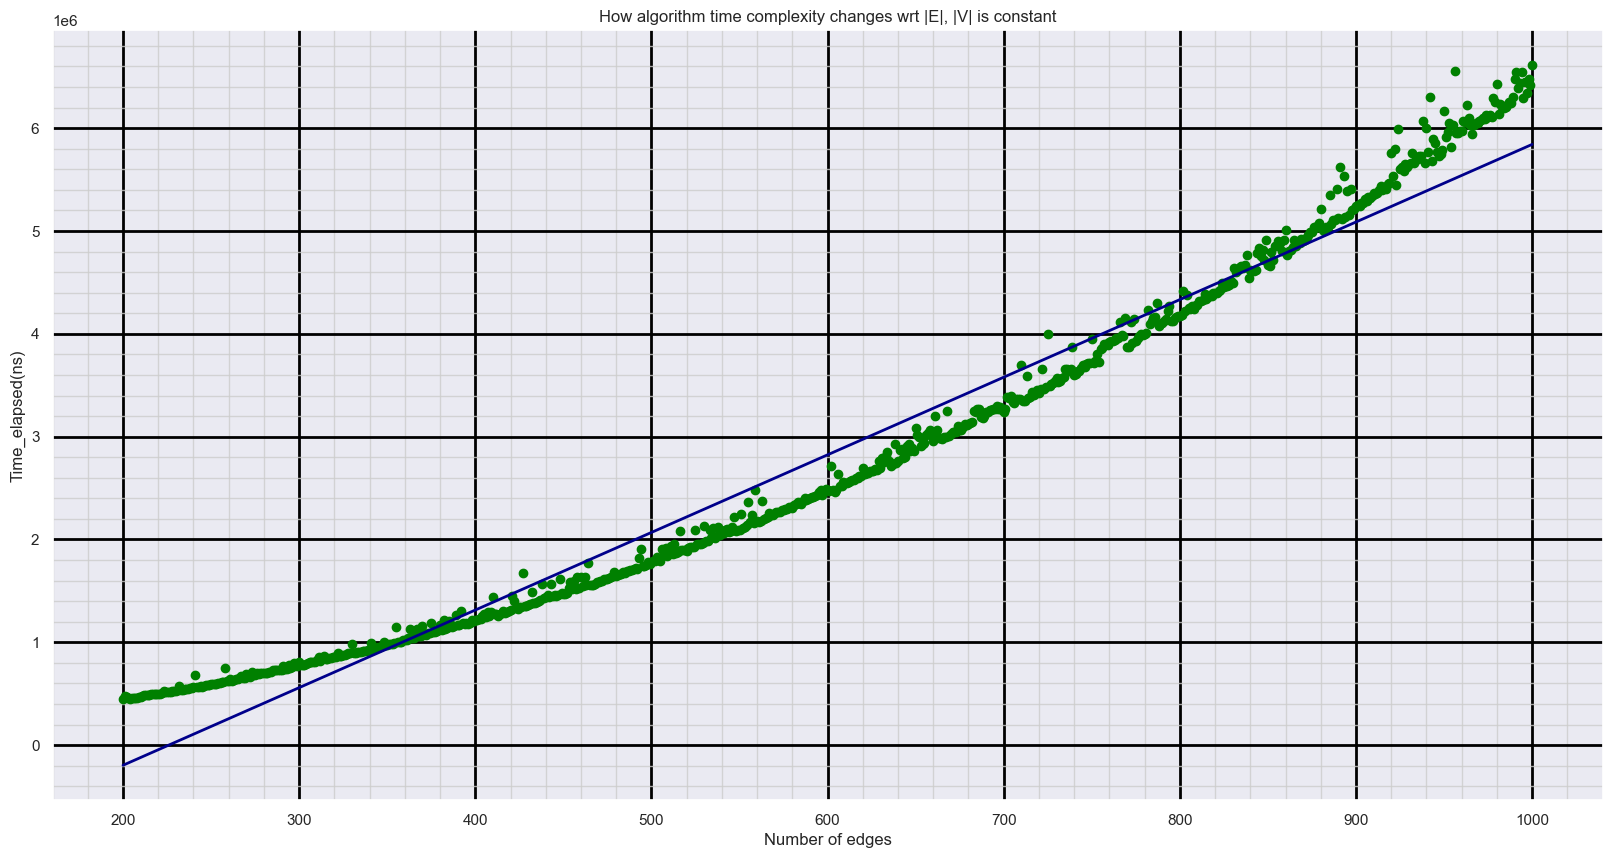

In [41]:
plt.figure(figsize=(20,10))
x = gm_tc1_df['|V|']
y = gm_tc1_df['Time_elapsed(ns)']
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color='green')
plt.grid(color ='black', linewidth=2)
plt.minorticks_on()
plt.grid(which='minor', color='0.8', alpha=0.8)
plt.xlabel('Number of edges')
plt.ylabel('Time_elapsed(ns)')
plt.title('How algorithm time complexity changes wrt |E|, |V| is constant')

#add line of best fit to plot
plt.plot(x, a*x+b, color='darkblue',label = "Adjacency matrix - |V| is constant", linewidth=2)

In [51]:
ga_tc2_heap_df = pd.read_csv('ga_tc2_heap.csv')
ga_tc2_heap_df.head()

,|E|,Time_elapsed(ns)
0,99,50900
1,100,50700
2,101,48400
3,102,52200
4,103,46500


C:\Users\Shu Shuang\AppData\Local\Temp\ipykernel_21752\63495189.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color ='black', linewidth=2)
C:\Users\Shu Shuang\AppData\Local\Temp\ipykernel_21752\63495189.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='0.8', alpha=0.8)


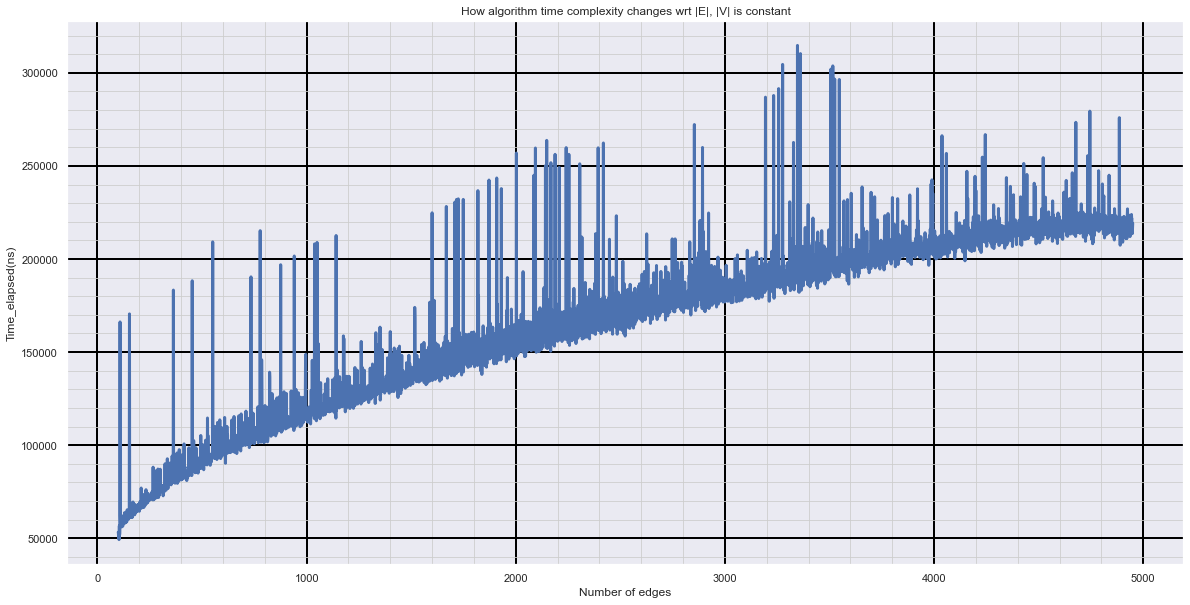

In [43]:
plt.figure(figsize=(20,10))
plt.plot(ga_tc2_heap_df['|E|'], ga_tc2_heap_df['Time_elapsed(ns)'],label = "Array of adjacency list - |V| is constant", linewidth=3)
plt.grid(b=True, color ='black', linewidth=2)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='0.8', alpha=0.8)

plt.xlabel('Number of edges')
plt.ylabel('Time_elapsed(ns)')
plt.title('How algorithm time complexity changes wrt |E|, |V| is constant')

plt.show()

C:\Users\Shu Shuang\AppData\Local\Temp\ipykernel_21752\3764389603.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color ='black', linewidth=2)
C:\Users\Shu Shuang\AppData\Local\Temp\ipykernel_21752\3764389603.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='0.8', alpha=0.8)


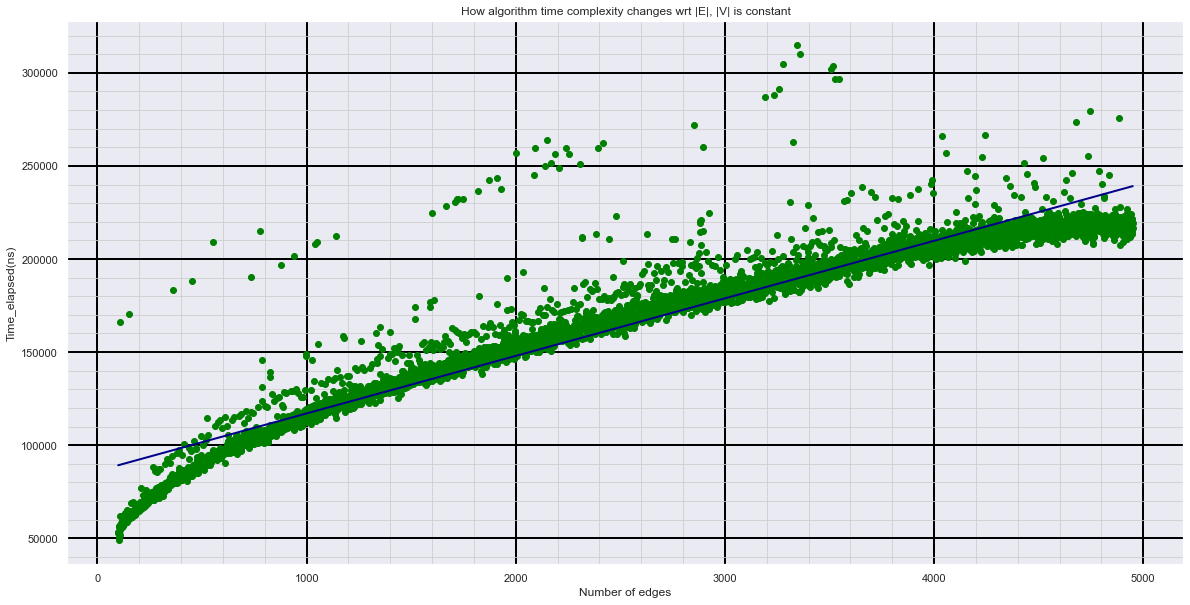

In [44]:
plt.figure(figsize=(20,10))
x = ga_tc2_heap_df['|E|']
y = ga_tc2_heap_df['Time_elapsed(ns)']
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color='green')
plt.grid(b=True, color ='black', linewidth=2)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='0.8', alpha=0.8)
plt.xlabel('Number of edges')
plt.ylabel('Time_elapsed(ns)')
plt.title('How algorithm time complexity changes wrt |E|, |V| is constant')

#add line of best fit to plot
plt.plot(x, a*x+b, color='darkblue',label = "Array of adjacency list - |V| is constant", linewidth=2)

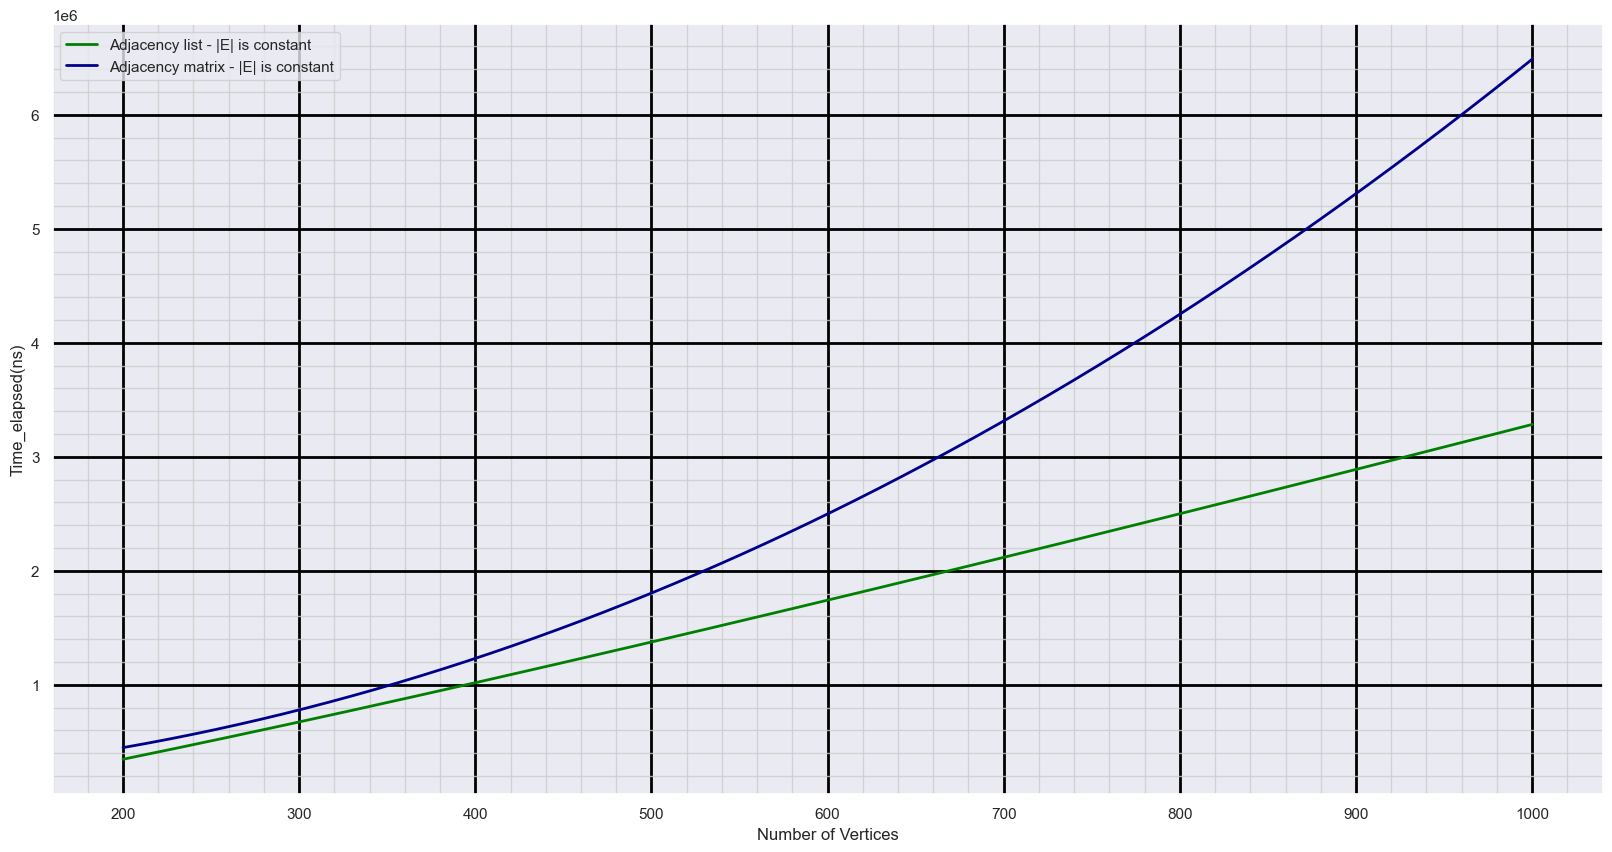

In [48]:
plt.figure(figsize=(20,10))
x1 = gm_tc1_df['|V|']
y1 = gm_tc1_df['Time_elapsed(ns)']
a1, b1 = np.polyfit(x1, y1, 1)
#plt.scatter(x1, y1, color='green')
plt.plot(x1,log_func(x, *popt_log), color='green',label = "Adjacency list - |E| is constant", linewidth=2)

x2 = ga_tc1_heap_df['|V|']
y2 = ga_tc1_heap_df['Time_elapsed(ns)']
a2, b2 = np.polyfit(x2, y2, 1)
#plt.scatter(x2, y2, color='orange')
plt.plot(x2, quadratic_func(x, *popt), color='darkblue',label = "Adjacency matrix - |E| is constant", linewidth=2)

plt.grid(color ='black', linewidth=2)
plt.minorticks_on()
plt.grid(which='minor', color='0.8', alpha=0.8)

plt.xlabel('Number of Vertices')
plt.ylabel('Time_elapsed(ns)')

plt.legend()
plt.show()

Text(0, 0.5, 'Time_elapsed(ns)')

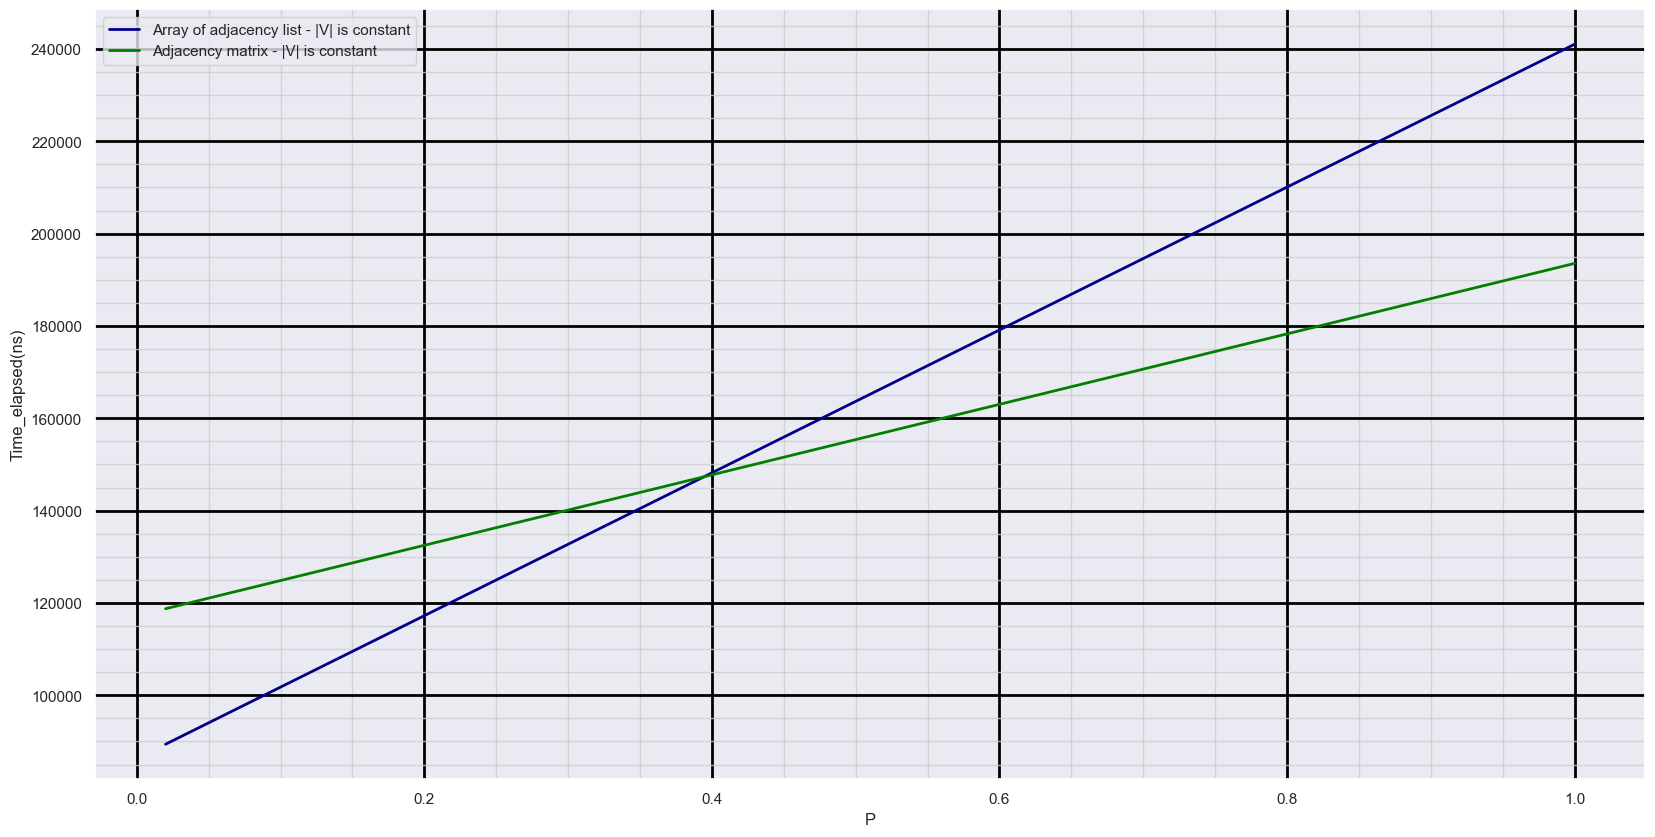

In [59]:
plt.figure(figsize=(20,10))
x1 = ga_tc2_heap_df['|E|']/4950
y1 = ga_tc2_heap_df['Time_elapsed(ns)']
a1, b1 = np.polyfit(x1, y1, 1)
plt.plot(x1, a1*x1+b1, color='darkblue',label = "Array of adjacency list - |V| is constant", linewidth=2)

x2 = gm_tc2_df['|E|']/4950
y2 = gm_tc2_df['Time_elapsed(ns)']
a2, b2 = np.polyfit(x2, y2, 1)
plt.plot(x2, a2*x2+b2, color='green',label = "Adjacency matrix - |V| is constant", linewidth=2)

plt.grid( color ='black', linewidth=2)
plt.minorticks_on()
plt.grid( which='minor', color='0.8', alpha=0.8)

plt.legend()
plt.xlabel('P')
plt.ylabel('Time_elapsed(ns)')


In [47]:
import numpy as np
from scipy import stats

In [50]:
x = gm_tc1_df['|V|']
y = gm_tc1_df['Time_elapsed(ns)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

print(f"R-squared value: {r_squared}")

R-squared value: 0.9706738198534874


In [51]:
x = ga_tc2_heap_df['|E|']
y = ga_tc2_heap_df['Time_elapsed(ns)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

print(f"R-squared value: {r_squared}")

R-squared value: 0.8984438136553737


In [52]:
timeArr1_sparse_df = pd.read_csv('timeArr1(Sparse).csv')
timeArr1_sparse_df.head()

,Nodes,Time (ns)
0,1,21122
1,2,52629
2,3,561
3,4,20585
4,5,2277


In [53]:
timeArr2_sparse_df = pd.read_csv('timeArr2(Sparse).csv')
timeArr2_sparse_df.head()

,Nodes,Time (ns)
0,1,6540
1,2,5586
2,3,191
3,4,2419
4,5,386


In [54]:
timeArr1_df = pd.read_csv('timeArr(test1).csv')
timeArr1_df.head()

,Nodes,Time (ns)
0,1,83881
1,2,95895
2,3,176314
3,4,717330
4,5,23809


In [55]:
timeArr2_df = pd.read_csv('timeArr(test2).csv')
timeArr2_df.head()

,Nodes,Time (ns)
0,1,149916
1,2,157319
2,3,768555
3,4,1501168
4,5,105234


In [92]:
timeArr1_dense_df = pd.read_csv('timeArr1(Dense).csv')
timeArr1_dense_df.head()

,Nodes,Time (ns)
0,1,84013
1,2,96027
2,3,176446
3,4,717462
4,5,23941


In [88]:
timeArr2_dense_df = pd.read_csv('timeArr2(Dense).csv')
timeArr2_dense_df.head()

,Nodes,Time (ns)
0,1,6578
1,2,5624
2,3,229
3,4,2457
4,5,424


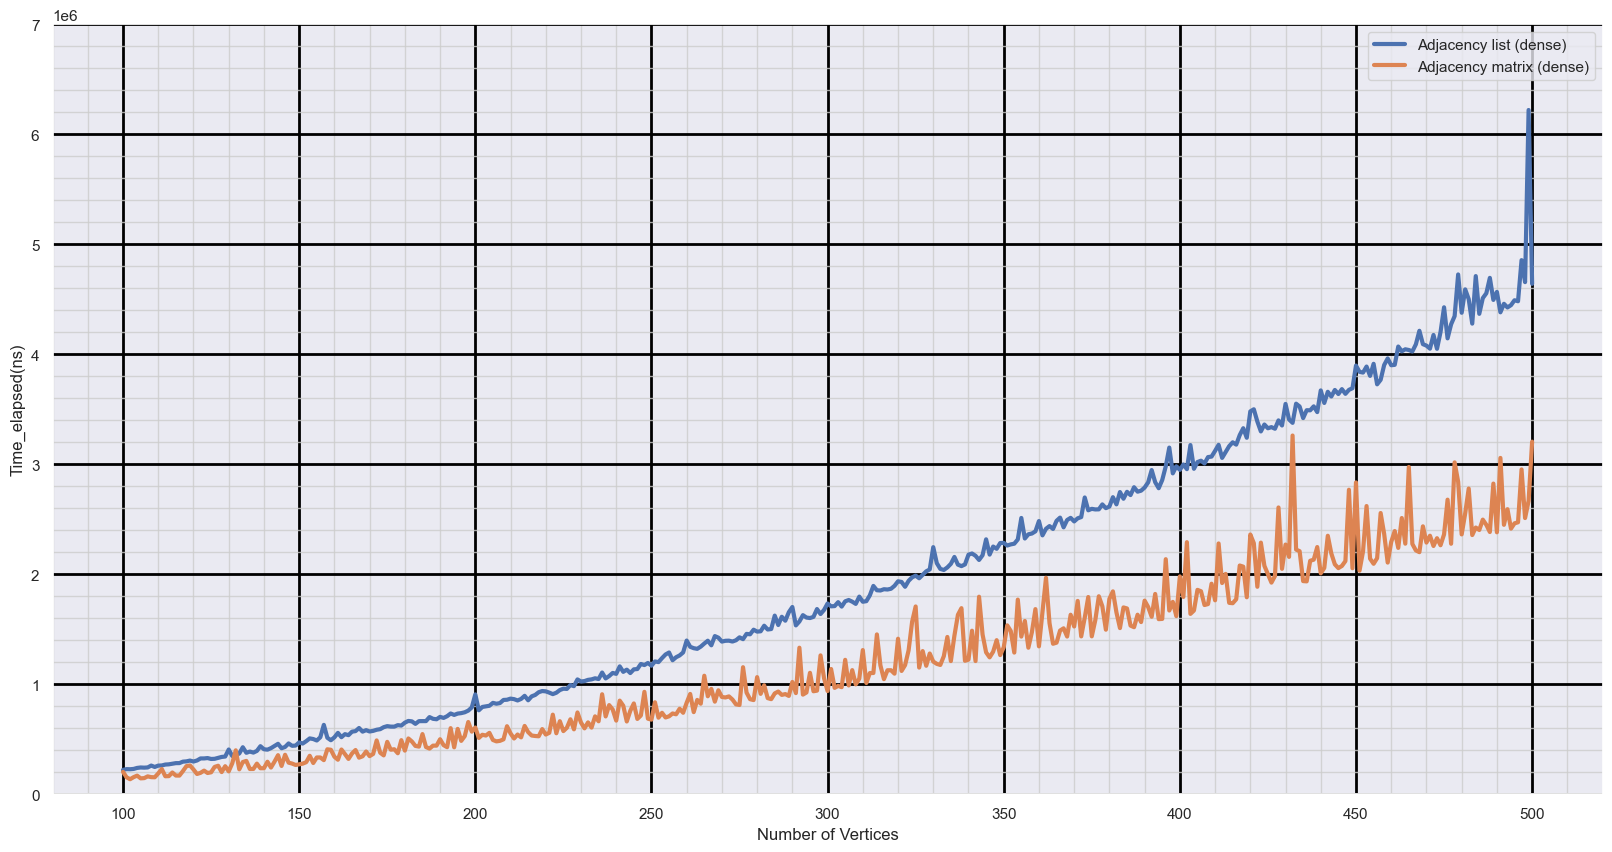

In [18]:
df = pd.read_csv("ga_tc3(1.0).csv")
plt.figure(figsize=(20,10))


x1 = df['|E|']
y1 = df['Time_elapsed_GA(ns)']
plt.plot(x1,y1,label = "Adjacency list (dense)", linewidth=3)
#a1, b1 = np.polyfit(x1, y1, 1)
#plt.plot(x1, a1*x1+b1, color='darkblue',label = "timeArr1_df", linewidth=2)

x1 = df['|E|']
y1 = df['Time_elapsed_GM(ns)']
plt.plot(x1,y1,label = "Adjacency matrix (dense)", linewidth=3)
#a1, b1 = np.polyfit(x1, y1, 1)
#plt.plot(x1, a1*x1+b1, color='darkblue',label = "Array of adjacency list - |V| is constant", linewidth=2)

plt.grid(color ='black', linewidth=2)
plt.minorticks_on()
plt.grid(which='minor', color='0.8', alpha=0.8)

plt.legend()
plt.xlabel('Number of Vertices')
plt.ylabel('Time_elapsed(ns)')
plt.ylim(0,7000000)

plt.show()

C:\Users\Shu Shuang\AppData\Local\Temp\ipykernel_21752\1203932617.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color ='black', linewidth=2)
C:\Users\Shu Shuang\AppData\Local\Temp\ipykernel_21752\1203932617.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='0.8', alpha=0.8)


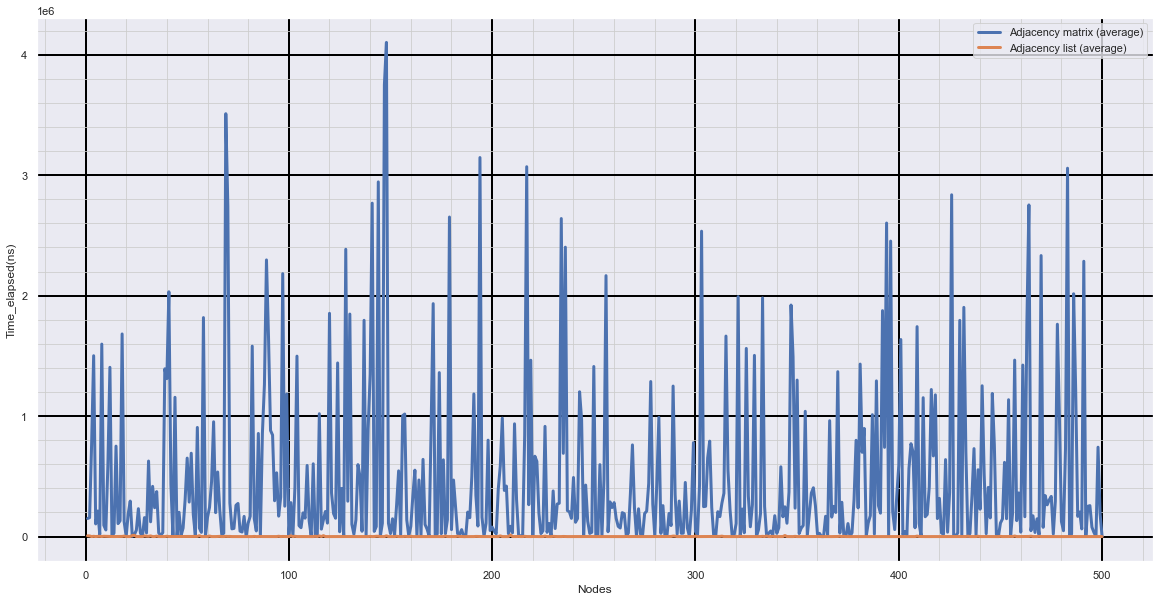

In [90]:
plt.figure(figsize=(20,10))

x2 = timeArr2_df['Nodes']
y2 = timeArr2_df['Time (ns)']
plt.plot(timeArr2_df['Nodes'], timeArr2_df['Time (ns)'],label = "Adjacency matrix (average)", linewidth=3)
#a2, b2 = np.polyfit(x2, y2, 1)
#plt.plot(x2, a2*x2+b2, color='green',label = "timeArr2_df", linewidth=2)

x2 = timeArr2_sparse_df['Nodes']
y2 = timeArr2_sparse_df['Time (ns)']
plt.plot(timeArr2_sparse_df['Nodes'], timeArr2_sparse_df['Time (ns)'],label = "Adjacency list (average)", linewidth=3)
#a2, b2 = np.polyfit(x2, y2, 1)
#plt.plot(x2, a2*x2+b2, color='green',label = "Adjacency matrix - |V| is constant", linewidth=2)


plt.grid(b=True, color ='black', linewidth=2)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='0.8', alpha=0.8)

plt.legend()
plt.xlabel('Nodes')
plt.ylabel('Time_elapsed(ns)')

plt.show()

C:\Users\Shu Shuang\AppData\Local\Temp\ipykernel_21752\2458197908.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color ='black', linewidth=2)
C:\Users\Shu Shuang\AppData\Local\Temp\ipykernel_21752\2458197908.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='0.8', alpha=0.8)


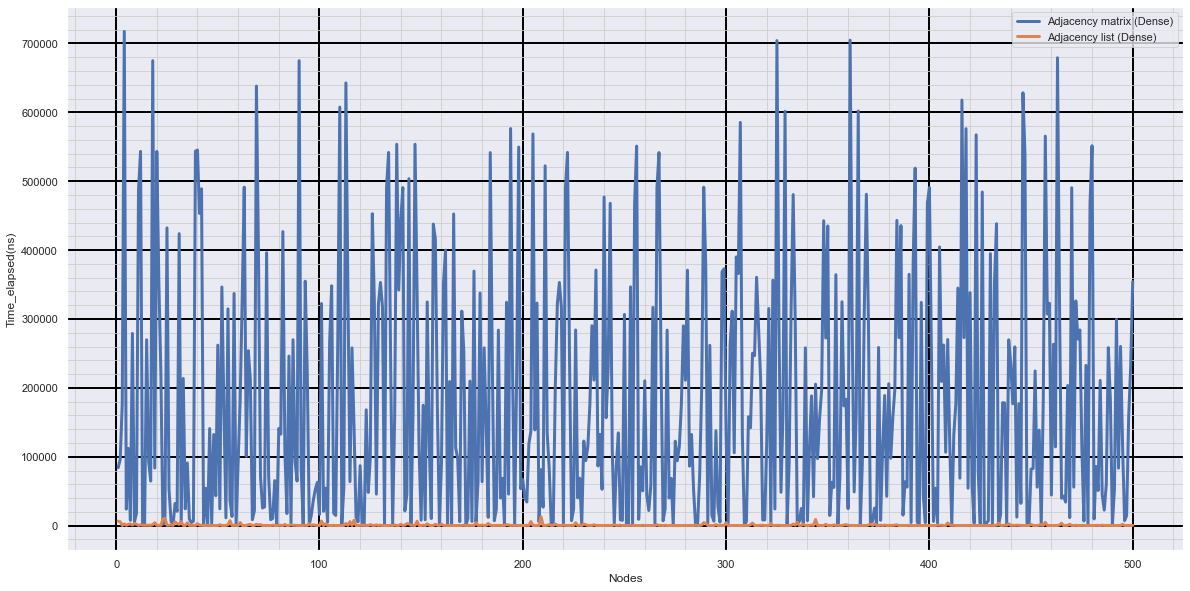

In [93]:
plt.figure(figsize=(20,10))

x2 = timeArr1_dense_df['Nodes']
y2 = timeArr1_dense_df['Time (ns)']
plt.plot(timeArr1_dense_df['Nodes'], timeArr1_dense_df['Time (ns)'],label = "Adjacency matrix (Dense)", linewidth=3)
#a2, b2 = np.polyfit(x2, y2, 1)
#plt.plot(x2, a2*x2+b2, color='green',label = "timeArr2_df", linewidth=2)

x2 = timeArr2_dense_df['Nodes']
y2 = timeArr2_dense_df['Time (ns)']
plt.plot(timeArr2_dense_df['Nodes'], timeArr2_dense_df['Time (ns)'],label = "Adjacency list (Dense)", linewidth=3)
#a2, b2 = np.polyfit(x2, y2, 1)
#plt.plot(x2, a2*x2+b2, color='green',label = "Adjacency matrix - |V| is constant", linewidth=2)


plt.grid(b=True, color ='black', linewidth=2)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='0.8', alpha=0.8)

plt.legend()
plt.xlabel('Nodes')
plt.ylabel('Time_elapsed(ns)')

plt.show()